# HSSM Tutorial

This notebook demonstrates how to use the HSSM class to create hierarchical models. The tutorial will be based on simulated data from the [SSM Simulators (SSMS)](https://github.com/AlexanderFengler/ssms) package.

In [1]:
import arviz as az
import numpy as np
import pandas as pd
import pytensor

import hssm
import ssms.basic_simulators

pytensor.config.floatX = "float32"

## Simulating a dataset
-  `dataset` passed to the model should always include 'rt' and 'response'.
-  `dataset` should be a pandas dataframe.

In [2]:
# Simulate some data
v_true, a_true, z_true, t_true, sv_true = [0.5, 1.5, 0.5, 0.5, 0.0]
obs_ddm = ssms.basic_simulators.simulator(
    [v_true, a_true, z_true, t_true, sv_true], model="ddm", n_samples=1000
)
obs_ddm = np.column_stack([obs_ddm["rts"][:, 0], obs_ddm["choices"][:, 0]])
dataset = pd.DataFrame(obs_ddm, columns=["rt", "response"])

dataset

,rt,response
0,1.354993,-1.0
1,3.957932,1.0
2,1.334993,1.0
3,1.621996,1.0
4,2.526036,1.0
...,...,...
995,1.030997,1.0
996,1.330993,1.0
997,1.595995,1.0
998,2.496037,1.0


## The simplest case
### DDM using the analytical likelihood function from Navarro & Fuss (2009)

#### Analytical model
Simplest usage of HSSM, only data needs to be provided.

In [3]:
simple_ddm_model = hssm.HSSM(data=dataset)
simple_ddm_model

Hierarchical Sequential Sampling Model
Model: ddm

Response variable: rt,response
Observations: 1000

Parameters:

v ~ Uniform(lower: -3.0, upper: 3.0)	bounds: (-3.0, 3.0)
sv = 0.0
a ~ Uniform(lower: 0.30000001192092896, upper: 2.5)	bounds: (0.3, 2.5)
z ~ Uniform(lower: 0.10000000149011612, upper: 0.8999999761581421)	bounds: (0.1, 0.9)
t ~ Uniform(lower: 0.0, upper: 2.0)	bounds: (0.0, 2.0)

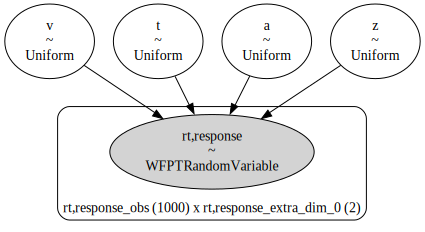

In [4]:
simple_ddm_model.graph()

In [5]:
simple_ddm_model.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [z, t, a, v]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 961 seconds.
/Users/aomar7/Library/Caches/pypoetry/virtualenvs/hssm-t7Cza8gi-py3.11/lib/python3.11/site-packages/arviz/stats/diagnostics.py:584: RuntimeWarning: divide by zero encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
Chain 0 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.
Chain 1 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.
Chain 2 reached the maximum tree depth. Increase `max_tr

Inference data with groups:
	> posterior
	> sample_stats
	> observed_data

/Users/aomar7/Library/Caches/pypoetry/virtualenvs/hssm-t7Cza8gi-py3.11/lib/python3.11/site-packages/arviz/stats/density_utils.py:487: UserWarning: Your data appears to have a single value or no finite values
  warnings.warn("Your data appears to have a single value or no finite values")
/Users/aomar7/Library/Caches/pypoetry/virtualenvs/hssm-t7Cza8gi-py3.11/lib/python3.11/site-packages/arviz/stats/density_utils.py:487: UserWarning: Your data appears to have a single value or no finite values
  warnings.warn("Your data appears to have a single value or no finite values")
/Users/aomar7/Library/Caches/pypoetry/virtualenvs/hssm-t7Cza8gi-py3.11/lib/python3.11/site-packages/arviz/stats/density_utils.py:487: UserWarning: Your data appears to have a single value or no finite values
  warnings.warn("Your data appears to have a single value or no finite values")
/Users/aomar7/Library/Caches/pypoetry/virtualenvs/hssm-t7Cza8gi-py3.11/lib/python3.11/site-packages/arviz/stats/density_utils.py:487: Us

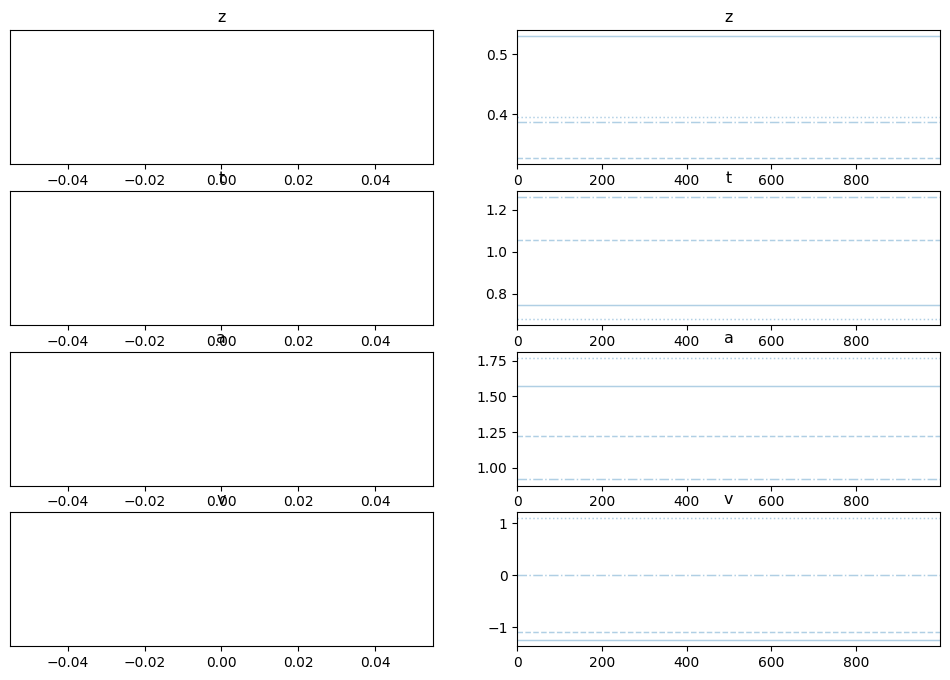

In [6]:
az.plot_trace(simple_ddm_model.traces);

In [7]:
az.summary(simple_ddm_model.traces)

/Users/aomar7/Library/Caches/pypoetry/virtualenvs/hssm-t7Cza8gi-py3.11/lib/python3.11/site-packages/arviz/stats/diagnostics.py:584: RuntimeWarning: divide by zero encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/Users/aomar7/Library/Caches/pypoetry/virtualenvs/hssm-t7Cza8gi-py3.11/lib/python3.11/site-packages/arviz/stats/diagnostics.py:584: RuntimeWarning: divide by zero encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/Users/aomar7/Library/Caches/pypoetry/virtualenvs/hssm-t7Cza8gi-py3.11/lib/python3.11/site-packages/arviz/stats/diagnostics.py:584: RuntimeWarning: divide by zero encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/Users/aomar7/Library/Caches/pypoetry/virtualenvs/hssm-t7Cza8gi-py3.11/lib/python3.11/site-packages/arviz/stats/diagnostics.py:584: RuntimeWarning: divide by zero encoun

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
z,0.410,0.074,0.326,0.530,0.037,0.028,4.0,4.0,inf
t,0.936,0.235,0.681,1.260,0.117,0.090,4.0,4.0,inf
a,1.371,0.328,0.917,1.772,0.163,0.125,4.0,4.0,inf
v,-0.313,0.942,-1.251,1.087,0.469,0.359,4.0,4.0,inf


## One step up: An angle model using an approximation network

#### Simulating Angle Data

In [8]:
# Simulate some data
v_true, a_true, z_true, t_true, theta_true = [0.5, 1.5, 0.5, 0.5, 0.3]
obs_angle = ssms.basic_simulators.simulator(
    [v_true, a_true, z_true, t_true, theta_true], model="angle", n_samples=1000
)
obs_angle = np.column_stack([obs_angle["rts"][:, 0], obs_angle["choices"][:, 0]])
dataset_lan = pd.DataFrame(obs_angle, columns=["rt", "response"])
dataset_lan

,rt,response
0,2.444035,1.0
1,2.742020,1.0
2,1.360992,1.0
3,2.172022,1.0
4,1.359993,1.0
...,...,...
995,1.593995,-1.0
996,2.581032,-1.0
997,1.120996,1.0
998,1.702000,1.0


This creates a default angle model using pytensor

In [9]:
angle_model = hssm.HSSM(data=dataset_lan, model="angle")
angle_model

Hierarchical Sequential Sampling Model
Model: angle

Response variable: rt,response
Observations: 1000

Parameters:

v ~ Uniform(lower: -3.0, upper: 3.0)	bounds: (-3.0, 3.0)
a ~ Uniform(lower: 0.30000001192092896, upper: 3.0)	bounds: (0.3, 3.0)
z ~ Uniform(lower: 0.10000000149011612, upper: 0.8999999761581421)	bounds: (0.1, 0.9)
t ~ Uniform(lower: 0.0010000000474974513, upper: 2.0)	bounds: (0.001, 2.0)
theta ~ Uniform(lower: -0.10000000149011612, upper: 1.2999999523162842)	bounds: (-0.1, 1.3)

In [10]:
pytensor.config.floatX = "float32"

angle_model.sample(cores=1, draws=500, tune=500, mp_ctx="forkserver")

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [theta, t, z, a, v]


Sampling 2 chains for 500 tune and 500 draw iterations (1_000 + 1_000 draws total) took 48 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


Inference data with groups:
	> posterior
	> sample_stats
	> observed_data

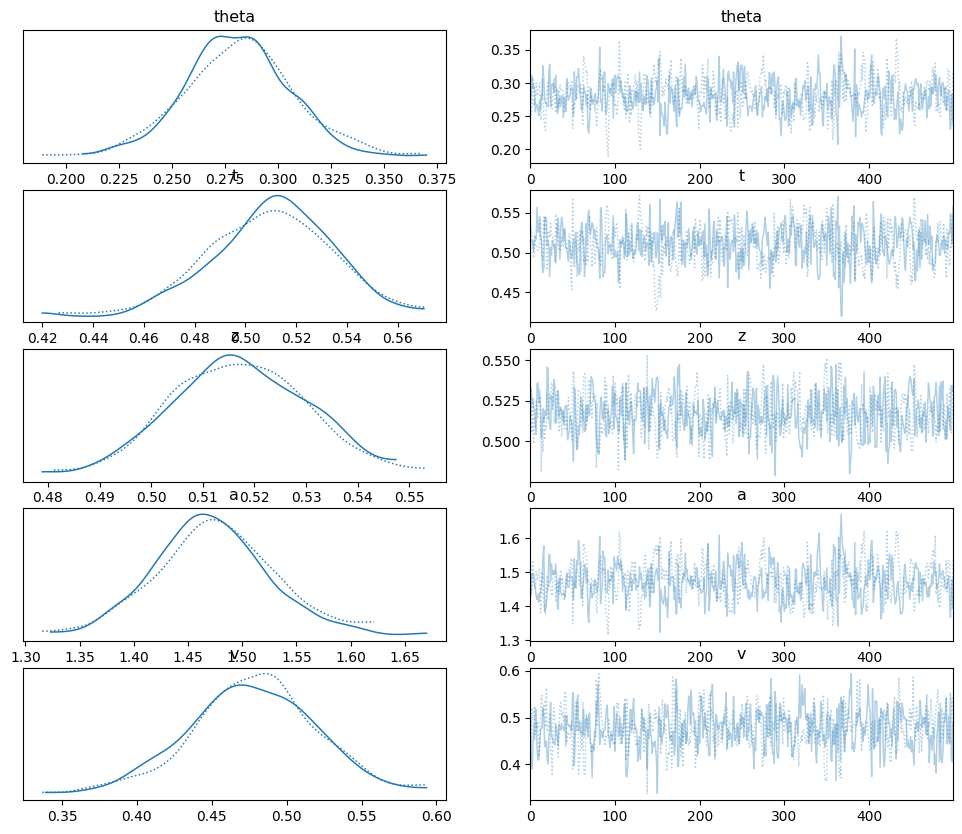

In [11]:
az.plot_trace(angle_model.traces);

#### Sampling the angle model using jax

In [12]:
from jax.config import config

config.update("jax_enable_x64", False)

angle_model.sample(sampler="nuts_numpyro")

Compiling...


/Users/aomar7/Library/Caches/pypoetry/virtualenvs/hssm-t7Cza8gi-py3.11/lib/python3.11/site-packages/pymc/sampling/jax.py:641: UserWarning: There are not enough devices to run parallel chains: expected 4 but got 1. Chains will be drawn sequentially. If you are running MCMC in CPU, consider using `numpyro.set_host_device_count(4)` at the beginning of your program. You can double-check how many devices are available in your system using `jax.local_device_count()`.
  pmap_numpyro = MCMC(


Compilation time =  0:00:00.996769
Sampling...


/Users/aomar7/Library/Caches/pypoetry/virtualenvs/hssm-t7Cza8gi-py3.11/lib/python3.11/site-packages/jax/_src/numpy/array_methods.py:795: UserWarning: Explicitly requested dtype float64 requested in astype is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  return getattr(self.aval, name).fun(self, *args, **kwargs)
sample: 100%|██████████| 2000/2000 [00:30<00:00, 65.11it/s, 9 steps of size 2.13e-01. acc. prob=0.94] 
/Users/aomar7/Library/Caches/pypoetry/virtualenvs/hssm-t7Cza8gi-py3.11/lib/python3.11/site-packages/jax/_src/numpy/array_methods.py:795: UserWarning: Explicitly requested dtype float64 requested in astype is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://gith

Sampling time =  0:01:54.736441
Transforming variables...
Transformation time =  0:00:00.086887


Inference data with groups:
	> posterior
	> sample_stats
	> observed_data

In [13]:
az.summary(angle_model.traces)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
theta,0.283,0.026,0.236,0.331,0.001,0.001,1237.0,1493.0,1.01
t,0.509,0.024,0.464,0.551,0.001,0.000,1171.0,1381.0,1.00
z,0.517,0.013,0.494,0.541,0.000,0.000,1952.0,2196.0,1.00
a,1.478,0.054,1.377,1.580,0.002,0.001,1162.0,1323.0,1.01
v,0.477,0.042,0.395,0.552,0.001,0.001,2031.0,2091.0,1.00


### Using include paramater to use regression and update priors.

#### Case 1: Regression type formula. 

In [14]:
# get some fake simulation data
intercept = 0.3
x = np.random.uniform(0.5, 0.2, size=1000)
y = np.random.uniform(0.4, 0.1, size=1000)

v = intercept + 0.8 * x + 0.3 * y

In [15]:
true_values = np.column_stack(
    [v, np.repeat([[1.5, 0.5, 0.5, 0.0]], axis=0, repeats=1000)]
)
true_values.shape

(1000, 5)

In [16]:
obs_ddm_reg_v = ssms.basic_simulators.simulator(true_values, model="ddm", n_samples=1)
obs_ddm_reg_v

dataset_reg_v = pd.DataFrame(
    {
        "rt": obs_ddm_reg_v["rts"].flatten(),
        "response": obs_ddm_reg_v["choices"].flatten(),
        "x": x,
        "y": y,
    }
)

dataset_reg_v

,rt,response,x,y
0,1.811005,-1,0.264241,0.242858
1,1.241994,-1,0.294463,0.311209
2,1.871008,-1,0.376829,0.168411
3,1.367992,1,0.348781,0.390173
4,2.913007,1,0.279730,0.328354
...,...,...,...,...
995,1.229994,1,0.310675,0.144584
996,1.380992,1,0.229063,0.278059
997,1.430992,1,0.497737,0.116614
998,1.008997,1,0.252626,0.378136


- v is parent
- x is a feature from the dataset_reg_v
- y is a feature from the dataset_reg_v

In [17]:
model_reg_v = hssm.HSSM(
    data=dataset_reg_v,
    include=[
        {
            "name": "v",
            "prior": {
                "Intercept": {"name": "Uniform", "lower": 0.0, "upper": 0.5},
                "x": {"name": "Uniform", "lower": 0.0, "upper": 1.0},
                "y": {"name": "Uniform", "lower": 0.0, "upper": 1.0},
            },
            "formula": "v ~ 1 + x + y",
            "link": "identity",
        }
    ],
)
model_reg_v

Hierarchical Sequential Sampling Model
Model: ddm

Response variable: rt,response
Observations: 1000

Parameters:

v ~ 1 + x + y
	Link: identity
	bounds: (-3.0, 3.0)
	Intercept ~ Uniform(lower: 0.0, upper: 0.5)
	x ~ Uniform(lower: 0.0, upper: 1.0)
	y ~ Uniform(lower: 0.0, upper: 1.0)
sv = 0.0
a ~ Uniform(lower: 0.30000001192092896, upper: 2.5)	bounds: (0.3, 2.5)
z ~ Uniform(lower: 0.10000000149011612, upper: 0.8999999761581421)	bounds: (0.1, 0.9)
t ~ Uniform(lower: 0.0, upper: 2.0)	bounds: (0.0, 2.0)

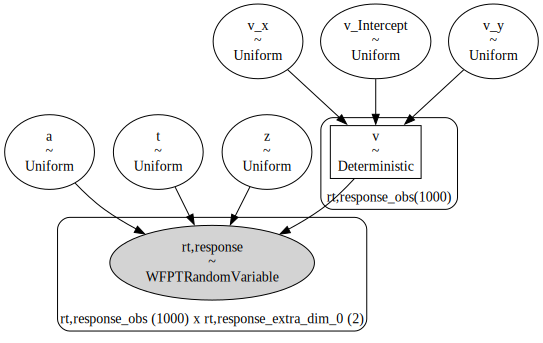

In [18]:
model_reg_v.graph()

In [19]:
trace_reg_v = model_reg_v.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [z, t, a, v_Intercept, v_x, v_y]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 492 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


array([[<Axes: title={'center': 'z'}>, <Axes: title={'center': 'z'}>],
       [<Axes: title={'center': 't'}>, <Axes: title={'center': 't'}>],
       [<Axes: title={'center': 'a'}>, <Axes: title={'center': 'a'}>],
       [<Axes: title={'center': 'v_Intercept'}>,
        <Axes: title={'center': 'v_Intercept'}>],
       [<Axes: title={'center': 'v_x'}>, <Axes: title={'center': 'v_x'}>],
       [<Axes: title={'center': 'v_y'}>, <Axes: title={'center': 'v_y'}>]],
      dtype=object)

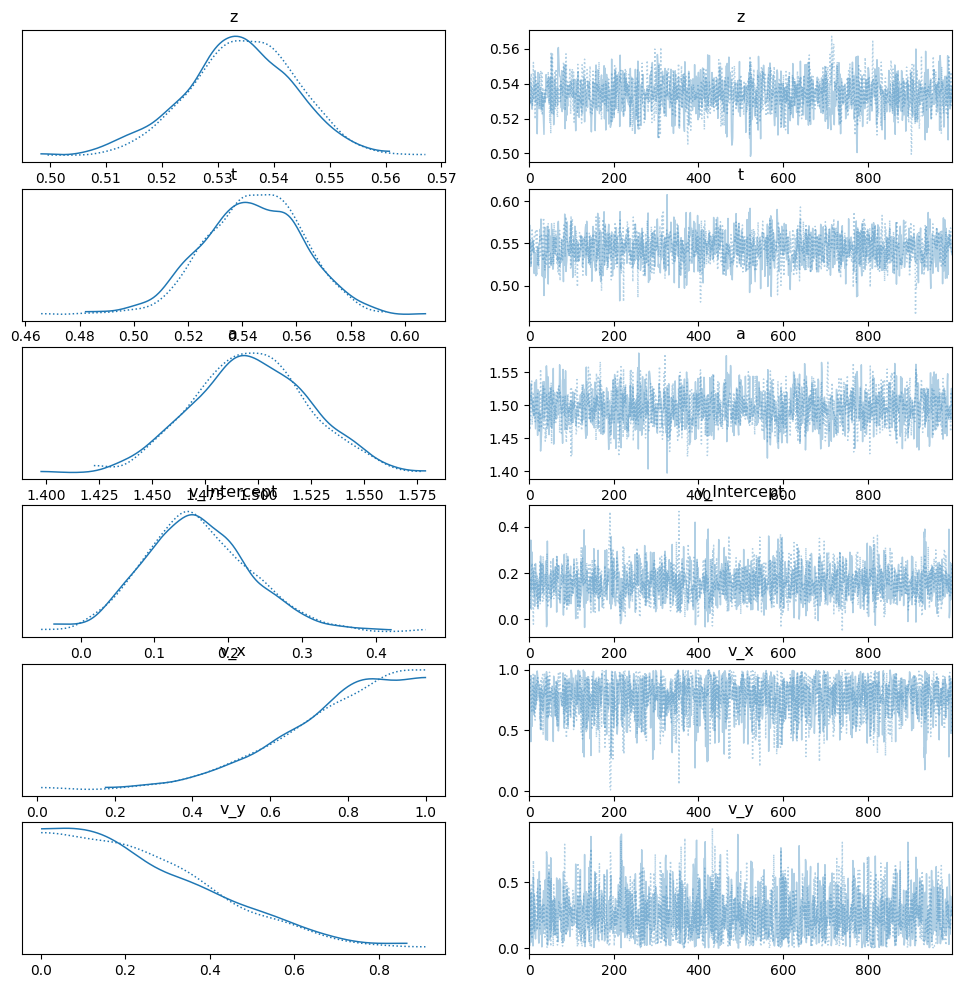

In [26]:
az.plot_trace(model_reg_v.traces)

In [27]:
# Looks like parameter recovery was successful
az.summary(model_reg_v.traces)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
z,0.534,0.010,0.516,0.553,0.000,0.000,1457.0,1386.0,1.0
t,0.544,0.018,0.511,0.577,0.000,0.000,1707.0,1366.0,1.0
a,1.497,0.027,1.448,1.549,0.001,0.000,1838.0,1304.0,1.0
v_Intercept,0.158,0.072,0.032,0.302,0.002,0.001,2252.0,1231.0,1.0
v_x,0.775,0.166,0.485,1.000,0.004,0.003,1710.0,1120.0,1.0
v_y,0.251,0.180,0.002,0.575,0.004,0.003,1828.0,1272.0,1.0


#### Case 2: adding initval to priors along with lower and upper.

- v is a parent
- x is a feature from the dataset_reg_v

Adding initval is optional.

In [28]:
hssm_include_val = hssm.HSSM(
    data=dataset_reg_v,
    include=[
        {
            "name": "v",  # change to name
            "prior": {
                "Intercept": {
                    "name": "Uniform",
                    "lower": -3.0,
                    "upper": 3.0,
                    "initval": 1.0,
                },
                "x": {"name": "Uniform", "lower": -0.5, "upper": 0.5, "initval": 0},
            },
            "formula": "v ~ 1 + x",
        }
    ],
)

In [29]:
hssm_include_val

Hierarchical Sequential Sampling Model
Model: ddm

Response variable: rt,response
Observations: 1000

Parameters:

v ~ 1 + x
	Link: identity
	bounds: (-3.0, 3.0)
	Intercept ~ Uniform(lower: -3.0, upper: 3.0, initval: 1.0)
	x ~ Uniform(lower: -0.5, upper: 0.5, initval: 0.0)
sv = 0.0
a ~ Uniform(lower: 0.30000001192092896, upper: 2.5)	bounds: (0.3, 2.5)
z ~ Uniform(lower: 0.10000000149011612, upper: 0.8999999761581421)	bounds: (0.1, 0.9)
t ~ Uniform(lower: 0.0, upper: 2.0)	bounds: (0.0, 2.0)

In [30]:
samples_two = hssm_include_val.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [z, t, a, v_Intercept, v_x]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 2809 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
Chain 0 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.
Chain 1 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.
Chain 2 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.


In [31]:
az.summary(samples_two)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
z,0.462,0.062,0.392,0.545,0.031,0.023,4.0,4.0,9.40
t,0.818,0.203,0.497,1.081,0.101,0.077,4.0,41.0,3.99
a,1.422,0.279,1.068,1.811,0.139,0.106,4.0,4.0,9.41
v_Intercept,0.837,0.803,-0.264,1.885,0.400,0.306,4.0,4.0,9.41
v_x,0.075,0.234,-0.164,0.475,0.115,0.088,4.0,4.0,3.83


#### Case 3: not specifying parent v in the include parameter. 

The parent is v by default, specifying it is not mandatory. 

In [32]:
hssm_include_val = hssm.HSSM(
    data=dataset_reg_v,
    include=[
        {
            "name": "a",  # change to name
            "prior": {
                "Intercept": {
                    "name": "Uniform",
                    "lower": 0.0,
                    "upper": 1.0,
                    "initval": 0.5,
                },
                "x": {"name": "Uniform", "lower": -0.5, "upper": 0.5, "initval": 0},
            },
            "formula": "a ~ 1 + x",
        }
    ],
)

In [33]:
hssm_include_val

Hierarchical Sequential Sampling Model
Model: ddm

Response variable: rt,response
Observations: 1000

Parameters:

a ~ 1 + x
	Link: identity
	bounds: (0.3, 2.5)
	Intercept ~ Uniform(lower: 0.0, upper: 1.0, initval: 0.5)
	x ~ Uniform(lower: -0.5, upper: 0.5, initval: 0.0)
v ~ Uniform(lower: -3.0, upper: 3.0)	bounds: (-3.0, 3.0)
sv = 0.0
z ~ Uniform(lower: 0.10000000149011612, upper: 0.8999999761581421)	bounds: (0.1, 0.9)
t ~ Uniform(lower: 0.0, upper: 2.0)	bounds: (0.0, 2.0)

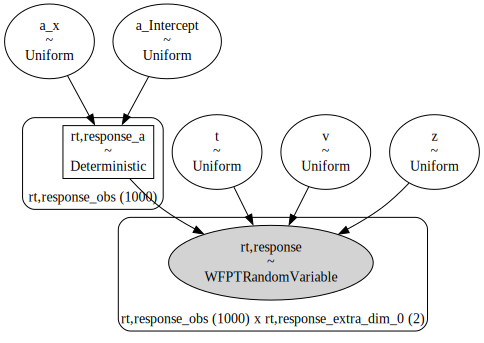

In [34]:
hssm_include_val.graph()

In [35]:
samples_three = hssm_include_val.sample(draws=500, tune=500)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [z, t, v, a_Intercept, a_x]


Sampling 4 chains for 500 tune and 500 draw iterations (2_000 + 2_000 draws total) took 1117 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
Chain 0 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.
Chain 1 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.
Chain 2 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.
Chain 3 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.


In [36]:
az.summary(samples_three)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
z,0.556,0.079,0.464,0.675,0.039,0.030,4.0,4.0,5.563132e+15
t,1.028,0.254,0.741,1.397,0.126,0.096,4.0,4.0,5.867876e+15
v,-0.213,0.783,-1.325,0.883,0.389,0.297,4.0,4.0,5.867876e+15
a_Intercept,0.604,0.106,0.477,0.770,0.052,0.040,4.0,4.0,5.563132e+15
a_x,-0.018,0.146,-0.182,0.178,0.073,0.056,4.0,4.0,5.867876e+15
...,...,...,...,...,...,...,...,...,...
"rt,response_a[995]",0.599,0.101,0.436,0.713,0.050,0.038,4.0,4.0,5.563132e+15
"rt,response_a[996]",0.600,0.100,0.447,0.728,0.050,0.038,4.0,4.0,5.563132e+15
"rt,response_a[997]",0.595,0.107,0.411,0.679,0.053,0.041,4.0,4.0,5.867876e+15
"rt,response_a[998]",0.600,0.100,0.444,0.723,0.050,0.038,4.0,4.0,5.563132e+15


#### Case 4, including multiple dictionaries in the include parameter. Creating hierarchical model. 

In [ ]:
hssm_include_list = hssm.HSSM(
    data=dataset_reg_v,
    include=[
        {
            "name": "v",
            "prior": {
                "Intercept": {"name": "Uniform", "lower": -2.0, "upper": 3.0},
                "x": {"name": "Uniform", "lower": -0.50, "upper": 0.50},
                "y": {"name": "Uniform", "lower": -0.50, "upper": 0.50},
            },
            "formula": "v ~ 1 + x + y",
        },
        {
            "name": "a",
            "prior": {
                "Intercept": {"name": "Uniform", "lower": -2.0, "upper": 3.0},
                "x": {"name": "Uniform", "lower": -0.50, "upper": 0.50},
                "y": {"name": "Uniform", "lower": -0.50, "upper": 0.50},
            },
            "formula": "a ~ 1 + x + y",
        },
    ],
)

In [ ]:
hssm_include_list.model

In [ ]:
hssm_include_list.graph()

In [ ]:
samples_two = hssm_include_list.sample(draws=100, tune=100)

#### Case 5. including multiple dictionaries in the include parameter. Specifying prior as a float number. 

In [ ]:
hssm_include_list = hssm.HSSM(
    data=dataset_reg_v,
    include=[
        {
            "name": "v",  # change to name
            "prior": {
                "Intercept": {"name": "Uniform", "lower": -3.0, "upper": 3.0},
                "x": {"name": "Uniform", "lower": -2.0, "upper": 1.0},
                "y": {"name": "Uniform", "lower": -2.0, "upper": 1.0},
            },
            "formula": "v ~ 1 + x + y",
        },
        {"name": "a", "prior": 0.5},
    ],
)

In [ ]:
samples_three = hssm_include_list.sample(draws=100, tune=100)